# Visualizing GP priors and posteriors

## SE Kernel
The SE kernel is of the form $K(x,x') = \rho^2 exp(- \frac{(x - x')^T (x - x')}{l^2})$. For the scalar version, this Kernel function transforms to $K(x,x') = \rho^2 exp(- \frac{(x - x')^2}{l^2})$

## GP prior, likelohood and posterior
The likelihood for GP is expressed as $p(y_n | x_n, f) = \mathcal{N}(y_n | f(x_n), \sigma^2)$. The prior for the GP can be expressed as $p(f) = \mathcal{N}(f | 0, K)$. Using this, the posterior was derived to be:
$p(f | x,y) = \mathcal{N} (f | (\sigma^2 K^{-1} + I_N)^{-1} y,  \sigma^2(\sigma^2 K^{-1} + I_N)^{-1})$.
We experimented for $\sigma^2 = 0.05$ and for 5 values of $l = [0.2,0.5,1,2,10]$.

We generate dataset that embodies the function $y = sin(x) + \epsilon$, where $\epsilon \sim \mathcal{N}(0,\sigma^2)$.

In [9]:
#Author: 20111060 - Shrey Bhatt
#Generating the data
import math
import numpy as np

min_interv = 0
max_interv = 4 * math.pi
num_steps = 100
val_sigsq = 0.05

X_data = np.linspace(min_interv,max_interv,endpoint=True,num=num_steps)
#print(X_data)

y_data = np.sin(X_data)
X_sintr = np.sin(X_data)
y_noise = np.random.normal(0,val_sigsq,num_steps)
#print(y_noise)

y_data+=y_noise
#print(y_data)

In [10]:
#Generating Kernel matrix

SE_rhosq = 1
SE_lvs = [0.2,0.5,1,2,10]
L_siz = len(SE_lvs)

Kern_mat = np.zeros((L_siz,num_steps,num_steps))

for l in range(L_siz):
    for i in range(num_steps):
        for j in range(num_steps):
            Kern_mat[l][i][j] = SE_rhosq * math.exp(- (X_data[i] - X_data[j])**2 / (SE_lvs[l]**2))
        Kern_mat[l][i][i]+=0.001
            
#print(Kern_mat[0])

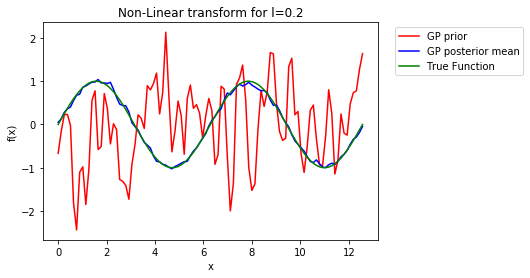

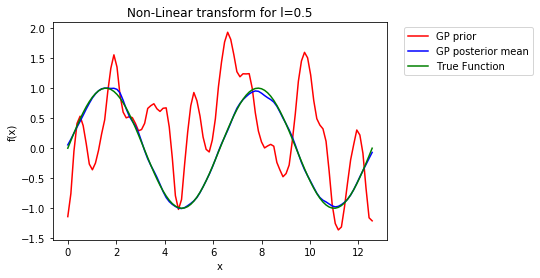

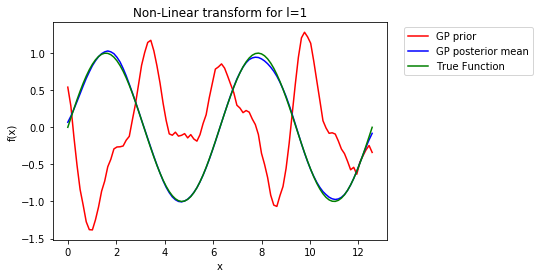

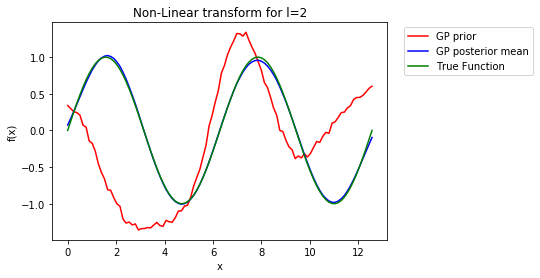

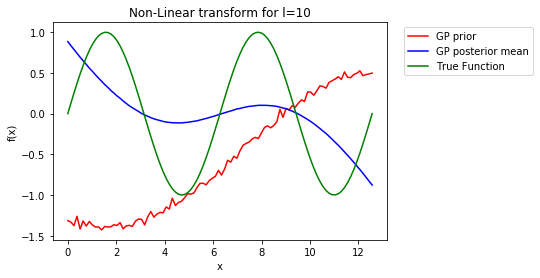

In [11]:
#Getting f(x_n) from various distribution
import matplotlib.pyplot as plt

loss_l1 = np.zeros((L_siz))
loss_l2 = np.zeros((L_siz))

for l in range(L_siz):
    ZeroVect = np.zeros(num_steps)
    GP_priorf = np.random.multivariate_normal(mean=ZeroVect,cov=Kern_mat[l])
    #print(GP_priorf)
    
    tempprodmat = val_sigsq*np.linalg.inv(Kern_mat[l])
    tempprodmat += np.identity(num_steps)
    tempprodmat2 = np.linalg.inv(tempprodmat)
    cov_poster = val_sigsq * tempprodmat2
    mean_poster = np.matmul(tempprodmat2,y_data)
    #print('MPr=', mean_poster)
    #print('Cpr=', cov_poster)
    GP_posterf = mean_poster
    #print('GP posterior:', GP_posterf)
    
    temp1 = np.power(GP_priorf - X_sintr,2)
    temp2 = np.power(GP_posterf - X_sintr,2)
    
    loss_l1[l] = np.sum(temp1)/num_steps
    loss_l2[l] = np.sum(temp2)/num_steps
    
    plt.title('Non-Linear transform for l=' + str(SE_lvs[l]))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.plot(X_data,GP_priorf,c='red',label='GP prior')
    plt.plot(X_data,GP_posterf,c='blue',label='GP posterior mean')
    plt.plot(X_data,X_sintr,c='green',label='True Function')
    plt.legend(loc='upper right',bbox_to_anchor=(1.45, 1))
    plt.show()

In [12]:
for l in range(L_siz):
    print('Squared loss for l=', SE_lvs[l], ' for prior:',  loss_l1[l], ' and for posterior:', loss_l2[l])

Squared loss for l= 0.2  for prior: 1.5837304837099302  and for posterior: 0.0021725705929602863
Squared loss for l= 0.5  for prior: 0.8450966060042472  and for posterior: 0.0008899931680616986
Squared loss for l= 1  for prior: 1.1995322239946153  and for posterior: 0.0006717815162536175
Squared loss for l= 2  for prior: 0.8228349291463446  and for posterior: 0.0006303164490112534
Squared loss for l= 10  for prior: 1.6212977072415509  and for posterior: 0.3280212389016603


## Observations
As observed from the plots and loss functions pertaining to different values of l, the GP posterior fit more as we approach from l=0.2 to l=2 and at l=2, the GP posterior best replicates the sin function. But as the value of l gets high i.e. 10, the prior and posterior, both appear to diverge from the true fit.